El objetivo principal es proporcionar una visión comprehensiva de los incidentes, identificando tendencias, relaciones y posibles áreas de intervención para mejorar la seguridad vial en Buenos Aires de donde es toda la información.

In [ ]:
pip install matplotlib

In [ ]:
pip install seaborn

In [ ]:
pip install folium

In [ ]:
pip install plotly

In [ ]:
pip install --upgrade nbformat

In [ ]:
#También me lo pidió instalar el sistema para hacer mapa de calor
!pip install --upgrade nbformat



In [2]:
# NumPy para soporte de arrays y matrices
import numpy as np
# Pandas para manipulación y análisis de datos
import pandas as pd
# Datetime y time para trabajar con objetos de fecha y hora
from datetime import datetime, time
# Matplotlib.pyplot para la creación de gráficos estáticos, animados e interactivos
import matplotlib.pyplot as plt
# Seaborn, una biblioteca de visualización de datos basada en matplotlib, para hacer gráficos más atractivos
import seaborn as sns
# Calendar, que proporciona funciones relacionadas con la visualización y manipulación de calendarios y fechas.
import calendar
# Importa el módulo cm de matplotlib, que es parte de la biblioteca de visualización matplotlib.
import matplotlib.cm as cm
# Importa la biblioteca folium para la creación de mapas interactivos y su plugin HeatMap para visualizaciones de densidad.
import folium
from folium.plugins import HeatMap
# Activa la extensión autoreload para recargar módulos automáticamente antes de ejecutar el código
%load_ext autoreload
# Configura autoreload para que recargue módulos cada vez que se ejecuta una celda
%autoreload 2
# Importar la biblioteca warnings para controlar las advertencias
import warnings
# Ignora todas las advertencias generadas para mantener limpia la salida del notebook
warnings.filterwarnings("ignore")
# Me pide instalarlo al hacer el mapa de calor para visualizar en python
import plotly.express as px



In [4]:
# Abro el df accidentes que ya esta limpío, pero lo verifico porsiacas

df_accidentes = r"C:\Users\Usuario\Henry\PI2_DA\ETLS y DFs\df_accidentes.parquet"


In [5]:
df_accidentes = pd.read_parquet(df_accidentes)


In [ ]:
df_accidentes

In [7]:
# Utilizo la función para verificar datos
def verificar_tipo_datos(df):
# Genero Diccionario vació para almacenar información sobre cada columna
    mi_dict = {"nombre_campo": [], "tipo_datos": [], "no_nulos_%": [], "nulos_%": [], "nulos": []}
    
# Iterar sobre  las columnas del DataFrame df
    for columna in df.columns:
        # Calcular el porcentaje de valores no nulos en la columna actual
        porcentaje_no_nulos = (df[columna].count() / len(df)) * 100
        
# Agregar información de mi_dict
        mi_dict["nombre_campo"].append(columna)
        mi_dict["tipo_datos"].append(df[columna].apply(type).unique())
        mi_dict["no_nulos_%"].append(round(porcentaje_no_nulos, 2))
        mi_dict["nulos_%"].append(round(100 - porcentaje_no_nulos, 2))
        mi_dict["nulos"].append(df[columna].isnull().sum())
        
# Crear un DataFrame con la información recopilada
    df_info = pd.DataFrame(mi_dict)
    
# Calcular el total de valores nulos en el DataFrame
    total_nulos = df.isnull().sum().sum()
    
# Imprimir el total de valores nulos
    print(f'Total de valores nulos en el DataFrame: {total_nulos}')
    
# Mostrar las columnas con valores nulos y sus respectivos porcentajes (ordenadas de mayor a menor)
    columnas_con_nulos = df_info[df_info["nulos"] > 0][["nombre_campo", "nulos_%"]].sort_values(by="nulos_%", ascending=False)
    if not columnas_con_nulos.empty:
        print("\nColumnas con valores nulos y sus porcentajes:")
        print(columnas_con_nulos)
        
# Devolver el DataFrame con la información de cada columna

    return df_info

In [ ]:
verificar_tipo_datos(df_accidentes)

In [ ]:
# Listo. verifico que esta limpia igual veo la info

In [ ]:
df_accidentes.info()

In [10]:
# Cambio nombre victima_x por victima

df_accidentes = df_accidentes.rename(columns={'VICTIMA_x': 'VICTIMA'})
                    

In [ ]:
df_accidentes.head()

In [12]:
# Hago una nueva columna año  para que quede bonito

df_accidentes['AÑO_HECHO'] = df_accidentes['FECHA_HECHO'].dt.year

In [13]:
df_accidentes = df_accidentes.rename ( columns={'ROL': 'ROL_VICTIMA'})


In [ ]:
df_accidentes.head()

In [25]:
''' Distibución Anual de Hechos'''
# Para entender la info de año grafico


' Distibución Anual de Hechos'

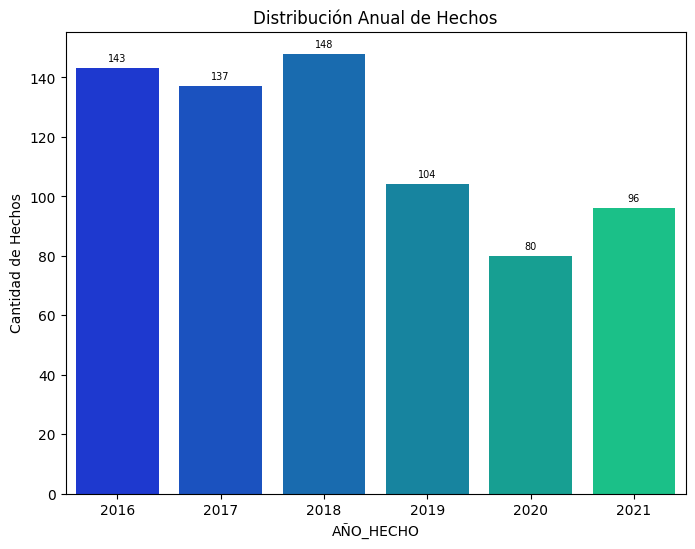

In [15]:

# Configura el tamaño de la figura para el gráfico
plt.figure(figsize=(8, 6))

# Crea un gráfico de barras con la cantidad de victimas por año, utilizando la paleta de colores 'viridis'
ax = sns.countplot(x=df_accidentes['AÑO_HECHO'], palette='winter')

# Establece el título del gráfico
plt.title('Distribución Anual de Hechos')

# Establece la etiqueta del eje X
plt.xlabel('AÑO_HECHO')

# Establece la etiqueta del eje Y
plt.ylabel('Cantidad de Hechos')

# Itera sobre las barras del gráfico para agregar la cantidad de accidentes sobre cada barra
for p in ax.patches:
    # Anota el valor de la altura de la barra (cantidad de accidentes) sobre ella
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 7), textcoords='offset points', fontsize=7)  # Ajusta el tamaño del texto aquí

# Muestra el gráfico
plt.show()

In [ ]:
''' Distribución Mensual de Hechos '''

In [40]:
# Se puede ver que en el año 2020 hubo uno reducción significativa de hechos lo cual me lleva 
# a concluir que los datos trabajan bien por que coincide con la pandema
# Pasada la pandemia aumento pero un poco menor que antes de la pandemia

In [16]:
# Hago una nueva columna mes que despues borro para que quede bonito

df_accidentes['MES_HECHO'] = df_accidentes['FECHA_HECHO'].dt.month

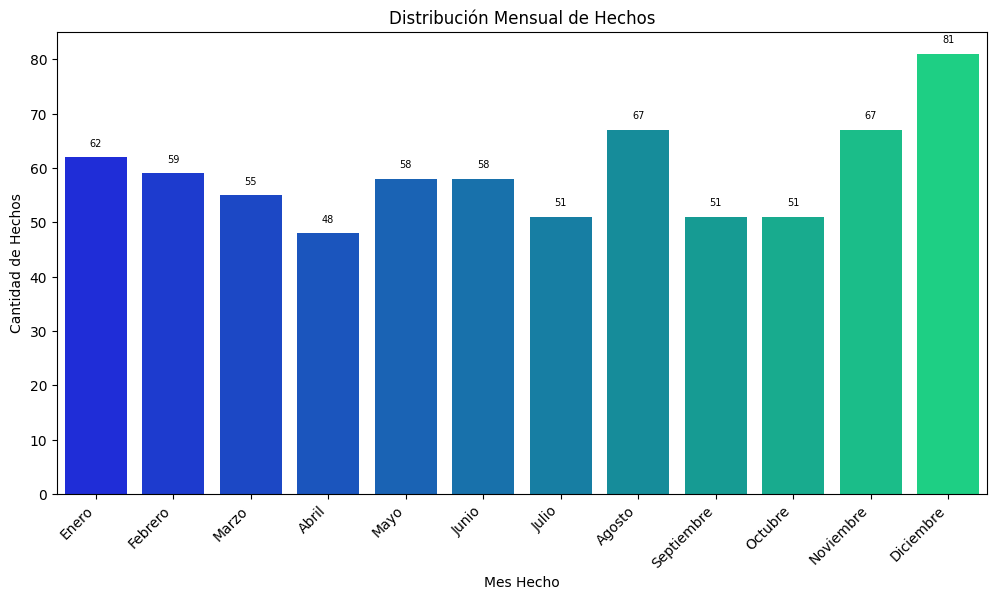

In [17]:

# Define un diccionario que asocia cada número de mes con su nombre correspondiente en español
meses = {1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril', 5: 'Mayo', 6: 'Junio',
         7: 'Julio', 8: 'Agosto', 9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'}

# Usa el diccionario 'meses' para convertir los números de mes en nombres en la columna 'MeMED_HECHO' del DataFrame 'df_homicidios'
df_accidentes['MES_HECHO'] = df_accidentes['MES_HECHO'].map(meses)

# Establece el tamaño de la figura del gráfico a 12x6 pulgadas
plt.figure(figsize=(12, 6))

# Crea un gráfico de barras que cuenta la cantidad de registros por cada mes, usando la paleta de colores 'viridis'
ax = sns.countplot(x=df_accidentes['MES_HECHO'], palette='winter')

# Rota las etiquetas del eje x en un ángulo de 45 grados para mejorar la legibilidad y alinea a la derecha
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Itera sobre las barras del gráfico para colocar una anotación con el total de registros encima de cada barra
for p in ax.patches:
    # Coloca una etiqueta con el número total de registros encima de cada barra, ajustando la posición y el tamaño del texto
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=7)

# Asigna un título al gráfico, indicando que muestra la distribución mensual de accidentes
plt.title('Distribución Mensual de Hechos')

# Etiqueta el eje x como 'Mes'
plt.xlabel('Mes Hecho')

# Etiqueta el eje y como 'Cantidad de Accidentes'
plt.ylabel('Cantidad de Hechos')

# Muestra el gráfico
plt.show()



Estudiando la distribución anual de todos los datos disponibles, se evidencia que hay una tendencia de aumento en los accidentes durante el año, alcanzando su punto máximo en diciembre. Los meses de diciembre, noviembre y agosto son los que registran mayor número de accidentes fatales, mientras que julio y septiembre presentan la menor cantidad de estos incidentes.

Para analizar mas profundo año por año la distribución de accidentes vamos a verlo año por año como es la tendencia, volviendo a ver como se aplana en el 2020 por la pandemia como mencionabamos anteriormente.

In [ ]:
''' Tendencia Hechos Mensal a travez de los Años'''

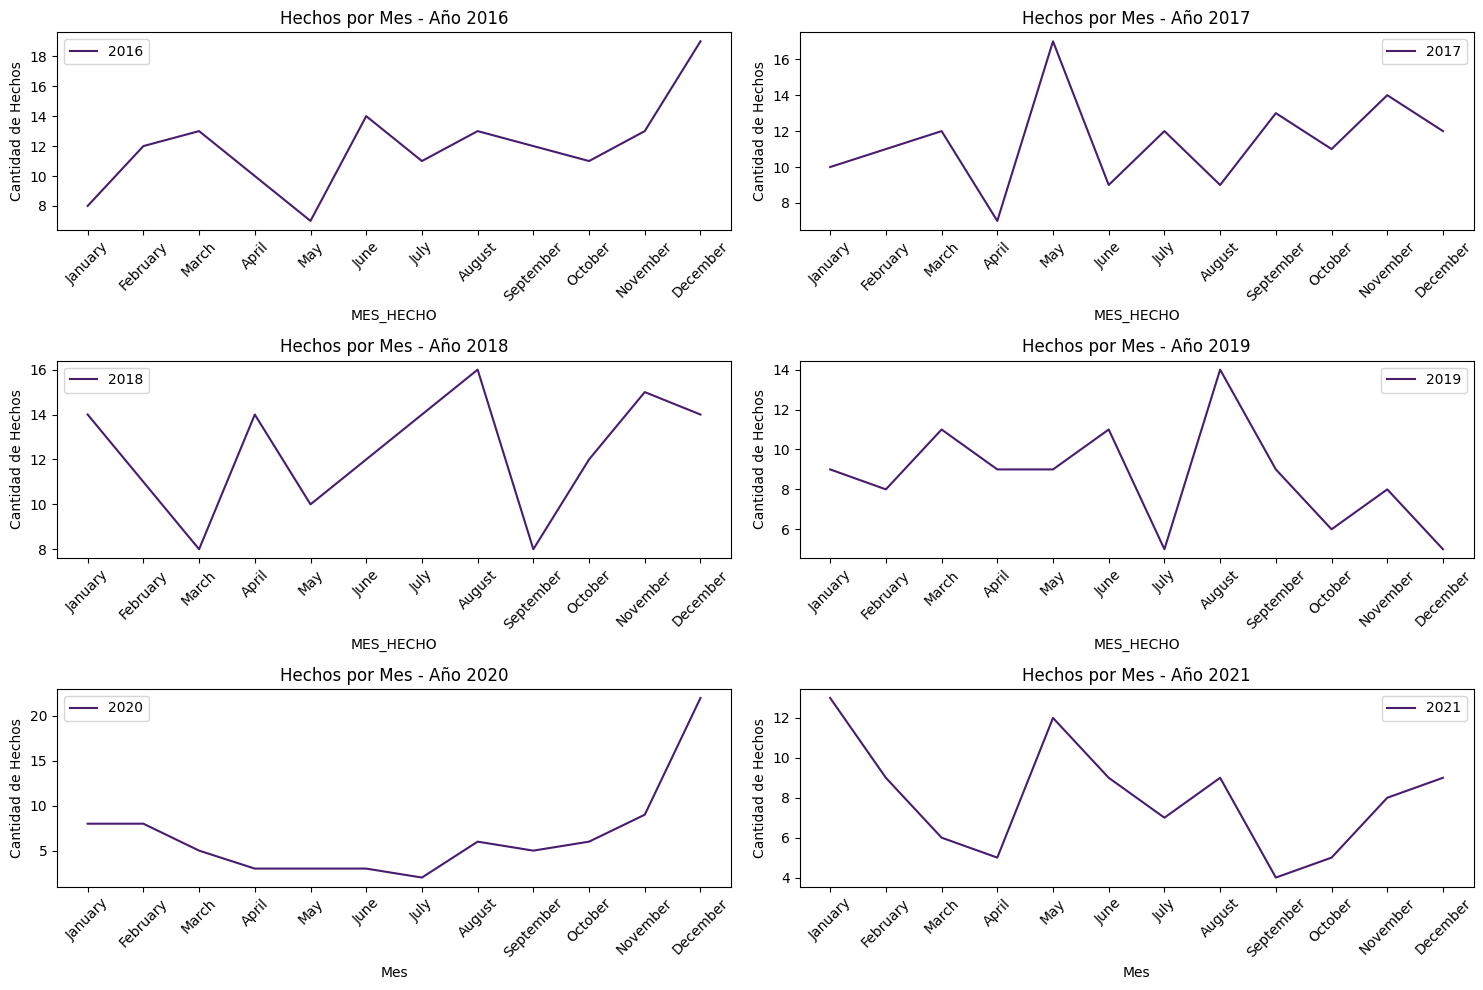

In [18]:

# Convertir la columna 'Fecha' a tipo datetime
df_accidentes['FECHA_HECHO'] = pd.to_datetime(df_accidentes['FECHA_HECHO'])

# Crear columnas de 'Año' y 'Mes' como enteros
df_accidentes['AÑO_HECHO'] = df_accidentes['FECHA_HECHO'].dt.year
df_accidentes['MES_HECHO'] = df_accidentes['FECHA_HECHO'].dt.month

# Configurar el estilo de seaborn para usar los colores de viridis
sns.set_palette("viridis", n_colors=12)

# Obtener los años únicos presentes en la columna 'Año'
unique_years = df_accidentes['AÑO_HECHO'].unique()

# Crear subgráficos en una matriz de 3x2
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))

# Iterar sobre cada año
for i, year in enumerate(unique_years):
    # Calcular la posición en la matriz
    row = i // 2
    col = i % 2

    # Filtrar el DataFrame para el año actual
    df_year = df_accidentes[df_accidentes['AÑO_HECHO'] == year]

    # Contar los homicidios por mes
    count_by_month = df_year.groupby('MES_HECHO').size()

    # Crear el gráfico de líneas
    sns.lineplot(x=count_by_month.index.map(lambda x: calendar.month_name[x]), y=count_by_month.values, ax=axes[row, col], label=str(year))

    # Configurar etiquetas y título
    axes[row, col].set_title(f'Hechos por Mes - Año {year}')
    axes[row, col].set_ylabel('Cantidad de Hechos')

    # Rotar las etiquetas de los meses a 45 grados
    axes[row, col].tick_params(axis='x', rotation=45)

# Configurar etiquetas en el eje x para el último subgráfico
axes[-1, 0].set_xlabel('Mes')
axes[-1, 1].set_xlabel('Mes')

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

In [ ]:
# Se evidencia que en el unico año que hubo decrecimiento en el mes de diciembre fué el 2019 que empata  con el 
# inicio de la pandema lo me lleva a concluir que definitivamente diciembre es un mes importnte para 
# Ejecutar los programas de prevención de accidentes de tránsito

In [17]:
''' Distribcución Semanal de Hechos'''

' Distribcución Semanal de Hechos'

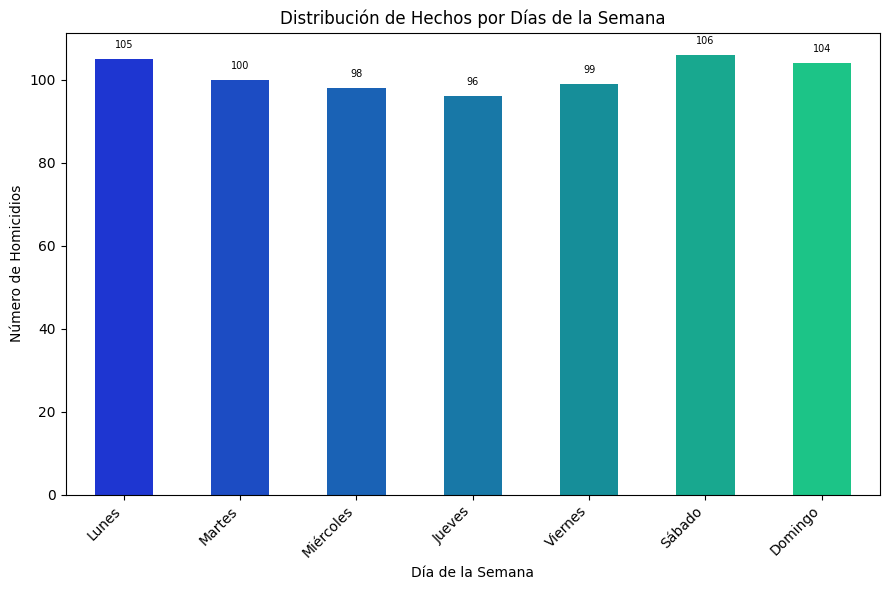

In [19]:

# Extraigo de la fecha el día de la semana
df_accidentes['DIA_SEMANA'] = df_accidentes['FECHA_HECHO'].dt.day_name()

# Mapear los días de la semana del inglés al español
dias_en_espanol = {
    'Monday': 'Lunes',
    'Tuesday': 'Martes',
    'Wednesday': 'Miércoles',
    'Thursday': 'Jueves',
    'Friday': 'Viernes',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
}
df_accidentes['DIA_SEMANA'] = df_accidentes['DIA_SEMANA'].map(dias_en_espanol)

# Cuento los hechos por día de la semana
dias_semana_counts = df_accidentes['DIA_SEMANA'].value_counts()[list(dias_en_espanol.values())]

# Crear el gráfico
plt.figure(figsize=(9, 6))
ax = sns.barplot(x=dias_semana_counts.index, y=dias_semana_counts.values, palette='winter',width=0.5)
plt.title('Distribución de Hechos por Días de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Número de Homicidios')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Agregar el total en las barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=7)

plt.tight_layout()
plt.show()


De este grafico puedo conclluir que no es notorio el impacto de los días de la semana en la cantidad de hechoa pues las diferencias en los numeros de hechos son mínimas. 

In [ ]:
El sabado es el día de mayor cantidad de hechos de la semana, seguido por el lunes, 
sinembargo no hay diferencias muy dicientes entre los Hechos los diferentes días de la semana

In [ ]:
df_accidentes.head()

In [ ]:
'''Distribución Geográfica de los Hechos'''

In [18]:
df_accidentes.head()

,ID_HECHO,No_VICTIMAS,FECHA_HECHO,HORA_HECHO,DIRECCION,COMUNA,VICTIMA,ACUSADO,COORDENADAS,ROL_VICTIMA,SEXO_VICTIMA,EDAD_VICTIMA,FECHA_FALLECIMIENTO,AÑO_HECHO,MES_HECHO,DIA_SEMANA
0,2016-0001,1,2016-01-01,0 days 04:00:00,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,MOTO,AUTO,"[-58.47533969, -34.68757022]",CONDUCTOR,MASCULINO,19,2016-01-01 00:00:00,2016,1,Viernes
1,2016-0002,1,2016-01-02,0 days 01:15:00,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,AUTO,PASAJEROS,"[-58.50877521, -34.66977709]",CONDUCTOR,MASCULINO,70,2016-01-02 00:00:00,2016,1,Sábado
2,2016-0003,1,2016-01-03,0 days 07:00:00,ENTRE RIOS AV. 2034,1,MOTO,AUTO,"[-58.39040293, -34.63189362]",CONDUCTOR,MASCULINO,30,2016-01-03 00:00:00,2016,1,Domingo
3,2016-0004,1,2016-01-10,0 days 00:00:00,"LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,MOTO,SD,"[-58.46503904, -34.68092974]",CONDUCTOR,MASCULINO,18,SD,2016,1,Domingo
4,2016-0005,1,2016-01-21,0 days 05:20:00,"SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,MOTO,PASAJEROS,"[-58.38718297, -34.62246630]",CONDUCTOR,MASCULINO,29,2016-02-01 00:00:00,2016,1,Jueves


In [ ]:
# Verifica que todas las entradas de la columna 'coordenadas' sean tuplas de longitud 2
if all(len(coord) == 2 for coord in df_accidentes['COORDENADAS']):
    # Divide la tupla en dos columnas separadas de latitud y longitud
    df_accidentes[['LONGITUD', 'LATITUD'] ]= pd.DataFrame(df_accidentes['COORDENADAS'].tolist(), columns=['LONGITUD', 'LATITUD'])
else:
    print("Error: Not all coordinates have length of 2.")

print(df_accidentes)

# No entiendo bien por que las coordenadas estan con un solo parentsis pues es una tupla cada registro, 
# igual lo divide, aunque no lo hubiera juntado desde un principio pero que iba a saber

In [21]:
# Como ya la dividi ahora borro coordenadas para volverla a crear a partir de float y no objetos
df_accidentes = df_accidentes.drop(columns = 'COORDENADAS')

In [ ]:
df_accidentes.info()

In [ ]:
# Ahora quederon latitud y longitud como objeto tengo que colverlo float

In [23]:
df_accidentes = df_accidentes[df_accidentes['LATITUD'] != '.']

In [24]:
df_accidentes['LATITUD'] = df_accidentes['LATITUD'].astype(float)

In [ ]:
df_accidentes.info()

In [26]:
df_accidentes['LONGITUD'] = df_accidentes['LONGITUD'].astype(float)

In [ ]:
df_accidentes.info()

In [ ]:
# Ahi ya quedaron como float latitud y longitud

In [28]:
df_accidentes['COORDENADAS'] = list(zip(df_accidentes['LATITUD'], df_accidentes['LONGITUD']))


In [ ]:
df_accidentes.head()

In [193]:
# df_accidentes.info()
# quedo coordenadas como objeto (,)pero a partir de numero voy a ver si funciona

In [30]:
# Crear un mapa centrado en Buenos Aires
mapa_buenos_aires = folium.Map(location=[-34.6037, -58.3816], zoom_start=12.5)

# Agregar marcadores al mapa para cada accidente
for index, row in df_accidentes.iterrows():
    folium.Marker(location=row['COORDENADAS'], popup=row['ID_HECHO']).add_to(mapa_buenos_aires)

# Mostrar el mapa en el cuaderno
mapa_buenos_aires

In [ ]:
# WWWOOOOWWWW funciono......no me sirve de muchoh por que lo voy a dibujar mas bonito 
# en ´PBI pero igual muy chevere

# Creo que me serviría mejor un mapa de calor como por comuna.... 

In [ ]:
df_accidentes.head()

In [32]:
# Crea un mapa centrado en Buenos Aires
mapa_buenos_aires = folium.Map(location=[-34.6037, -58.3816], zoom_start=12)

# Convierte las coordenadas en una lista de listas
coordenadas = df_accidentes[['LATITUD', 'LONGITUD']].values.tolist()

# Crea el mapa de calor con las coordenadas
HeatMap(coordenadas).add_to(mapa_buenos_aires)

# Muestra el mapa
mapa_buenos_aires.save("mapa_de_calor.html")


In [31]:
print("mapa_de_calor.html")

mapa_de_calor.html


In [86]:
# Funcionó bonito pero se queda en HTML osea que se visualiza en el navegador, pegaré la imagen en el github
# sinembargo sería mejor ver por ejemplo en que comuna hay mas accidentes

In [33]:
# Bueno también se uede usar libreria plotyexpress segun gpt asi:

# Agrupa el DataFrame 'df_accidentes' por las coordenadas de ubicación y calcula la frecuencia de homicidios para cada grupo. Luego, reinicia el índice para convertir el resultado en un DataFrame.
df_top_locations_freq = df_accidentes.groupby(['LATITUD', 'LONGITUD']).size().reset_index(name='Frecuencia')

# Encuentra la máxima frecuencia de homicidios entre todas las ubicaciones para establecer un rango de colores adecuado en el mapa.
max_frequency = df_top_locations_freq['Frecuencia'].max()

# Utiliza Plotly Express para crear un mapa de calor interactivo. Las coordenadas latitudinales y longitudinales se especifican junto con 'z', que representa la intensidad o frecuencia de los HECHOS en cada punto.
# Se configuran varios parámetros como el radio de influencia de cada punto, el centro y zoom inicial del mapa, el estilo del mapa, la opacidad de los puntos, el título, y una paleta de colores continua basada en tonos de rojo.
fig = px.density_mapbox(df_top_locations_freq, lat='LATITUD', lon='LONGITUD', z='Frecuencia',
                        radius=35, center=dict(lat=-34.6037, lon=-58.3816),
                        zoom=10, mapbox_style='open-street-map',
                        opacity=0.7,  # Configura la opacidad de los puntos en el mapa de calor para mejorar la visualización.
                        title='Mapa de Calor Interactivo de Hechos',
                        color_continuous_scale=px.colors.sequential.Reds,  # Selecciona una paleta de colores en tonos rojos para representar la frecuencia de homicidios.
                        range_color=(0, max_frequency))  # Ajusta el rango de colores para abarcar desde 0 hasta la máxima frecuencia de homicidios.

# Muestra el mapa de calor interactivo. Se especifican dimensiones para la visualización, aunque esta línea parece contener un error de sintaxis y no se ejecutará como se espera. En su lugar, debería ser simplemente `fig.show()`.
fig.show()

In [ ]:
# wwoooww funcionó pero igual tampoco me sirve mucho
# mucho por que no tengo como identificar en el mapa las comunas y eso , bueno podria cacharrear pero mehor 
# Hago otro tipo de diagrama para eso

In [ ]:
''' Cantidad de accidentes por Comuna'''

In [ ]:
df_accidentes.head()

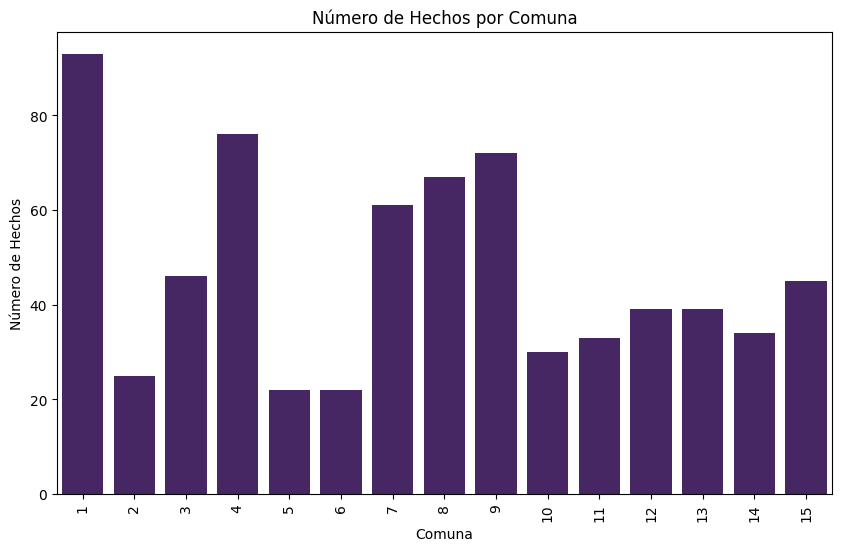

In [34]:
# Calcula el número de hechos por comuna y resetea el índice para obtener un DataFrame adecuado para el gráfico
hechos_por_comuna = df_accidentes.groupby('COMUNA').size().reset_index(name='cantidad_hechos')

# Ordena los datos por la cantidad de hechos en orden descendente
hechos_por_comuna = hechos_por_comuna.sort_values(by='cantidad_hechos', ascending=False)

# Configura el tamaño de la figura para el gráfico
plt.figure(figsize=(10, 6))

# Crea el gráfico de barras utilizando Seaborn
sns.barplot(data=hechos_por_comuna, x='COMUNA', y='cantidad_hechos')

# Añade etiquetas y título al gráfico
plt.xlabel('Comuna')
plt.ylabel('Número de Hechos')
plt.title('Número de Hechos por Comuna')

# Rota las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=90)

# Muestra el gráfico
plt.show()


In [ ]:
# De esta gráfica se podría concluir que la comuna
# donde se presentan mas hechos y que es necesario impactar es la comuna #1, por un importante margen
# Lo que indica que la zona donde se deberán desarrollar los programas será esa misma

In [ ]:
''' Comportamiento edad de las Víctimas'''
# Ya nos enfocamos en el estudio del hecho, en la geografía y ahora me centraré en la víctima
# Es interesante revisar que edad tienen el común de las víctimas
# Para este estudio lo podríamos hacer con un histrograma

In [ ]:
df_accidentes.head()

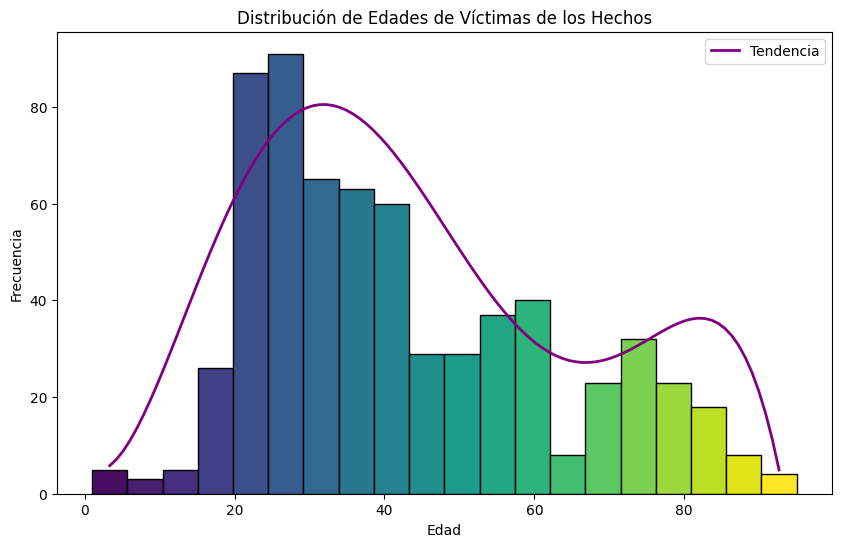

In [36]:
# Convierte la columna 'EDAD-VICTIMA' a numérica, tratando los errores con 'coerce' para convertir valores no numéricos en NaN.
df_accidentes['EDAD_VICTIMA'] = pd.to_numeric(df_accidentes['EDAD_VICTIMA'], errors='coerce')

# Elimina las filas donde la edad es NaN, asegurando que solo se trabaje con datos completos para el análisis.
df_accidentes = df_accidentes.dropna(subset=['EDAD_VICTIMA'])

# Configura el tamaño de la figura para el histograma y crea el histograma con 20 barras, añadiendo bordes negros para una mejor definición visual de cada barra.
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(df_accidentes['EDAD_VICTIMA'], bins=20, edgecolor='black')

# Configura el colormap 'viridis' para colorear las barras del histograma, donde cada barra se colorea en función de su valor.
colormap = cm.viridis
bin_centers = 0.5 * (bins[:-1] + bins[1:])  # Calcula el centro de cada barra para asignar colores.
colores = colormap(bin_centers / bin_centers.max())  # Normaliza los centros de las barras para el rango del colormap.

# Aplica el color calculado a cada barra del histograma.
for patch, color in zip(patches, colores):
    patch.set_facecolor(color)

# Ajusta y dibuja una curva de tendencia sobre el histograma. Se utiliza un polinomio de grado 5 para ajustar los centros de las barras y sus alturas.
x_vals = np.linspace(min(bin_centers), max(bin_centers), 100)
coefficients = np.polyfit(bin_centers, n, 5)  # Ajusta un polinomio de grado 5.
y_vals = np.polyval(coefficients, x_vals)  # Evalúa el polinomio ajustado.

# Dibuja la línea de tendencia sobre el histograma, ajustando la posición en el eje Y para mejorar la visualización.
plt.plot(x_vals, y_vals + 10, color='purple', linestyle='-', linewidth=2, label='Tendencia')

# Configura las etiquetas de los ejes y el título del gráfico para proporcionar contexto.
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de Edades de Víctimas de los Hechos')

# Añade una leyenda para explicar los elementos del gráfico.
plt.legend()


In [ ]:
# Se observa que el grueso de las víctimas oscilan entre los 20 y 30 años, tenendo una tendencia a la baja 
# que se reactiva al rededor de los 60 que podría explicarse por el deterioro de las capacidades con la vejez.

# También puede ser de interés del comportamiento la distribución de la edad de las víctimas que puede
# se representado ccon un diagrama de bigotes

In [ ]:
# Se puede concluir que independiente del año la edad de las víctimas oscila los 35-40 años

In [38]:
''' Distribución anual de la cantidad de Víctimas'''
# Al crear un gráfico de barras que separa los datos según el género para cada año, el código permite identificar
# tendencias y posibles patrones en la incidencia de los hechos, ofreciendo
# una visión clara de cómo las diferencias de género pueden influir en la victimización a lo largo del tiempo

' Distribución anual de la cantidad de víctimas'

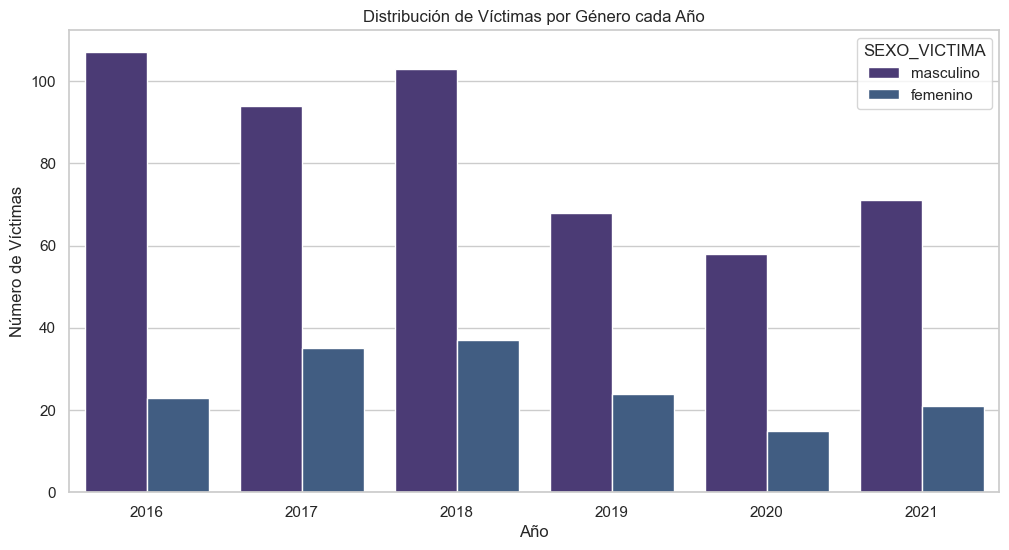

In [39]:
# Convierte todos los valores en la columna 'Sexo' a minúsculas 
df_accidentes['SEXO_VICTIMA'] = df_accidentes['SEXO_VICTIMA'].str.lower()

# Establece un estilo de fondo para los gráficos generados con Seaborn, mejorando la estética visual.
sns.set(style="whitegrid")

# Configura el tamaño de la figura para el gráfico a 12 pulgadas de ancho por 6 pulgadas de alto, asegurando que el gráfico sea lo suficientemente grande para una lectura clara.
plt.figure(figsize=(12, 6))

# Establece la paleta de colores 'viridis' para todos los gráficos generados por Seaborn, proporcionando una gama de colores coherente y visualmente agradable.
sns.set_palette("viridis")

# Crea el gráfico de barras utilizando la función countplot de Seaborn, agrupando los datos por 'Año' y diferenciando las barras por 'Sexo'.
ax = sns.countplot(x='AÑO_HECHO', hue='SEXO_VICTIMA', data=df_accidentes)

# Configura las etiquetas del eje X como 'Año' y del eje Y como 'Número de Víctimas', clarificando lo que representa cada eje.
ax.set_xlabel('Año')
ax.set_ylabel('Número de Víctimas')

# Establece el título del gráfico como 'Distribución de Víctimas por Género cada Año', proporcionando un contexto inmediato sobre el propósito del gráfico.
ax.set_title('Distribución de Víctimas por Género cada Año')

# Finalmente, muestra el gráfico generado. Esta función es esencial para visualizar el gráfico en entornos como notebooks de Jupyter.
plt.show()


In [ ]:
# De este gráfico se puede concluir que es mayor la frecuencia de víctimas de sexo masculino, 
# se podría explicar por el gusto mayoritariamente de los hombres a la velocidad en las vías

In [ ]:
# Es interesante encontrar la relación de la frecuencia de las víctimas mas alla del género por el rol que 
# se ocupa dentro de la escena del hecho.
# por lo tanto me parece que un diagrama de barras acostadas podría corresponder a dicho análisis

In [ ]:
df_accidentes.head()

In [ ]:
''' Rol de las Víctimas'''

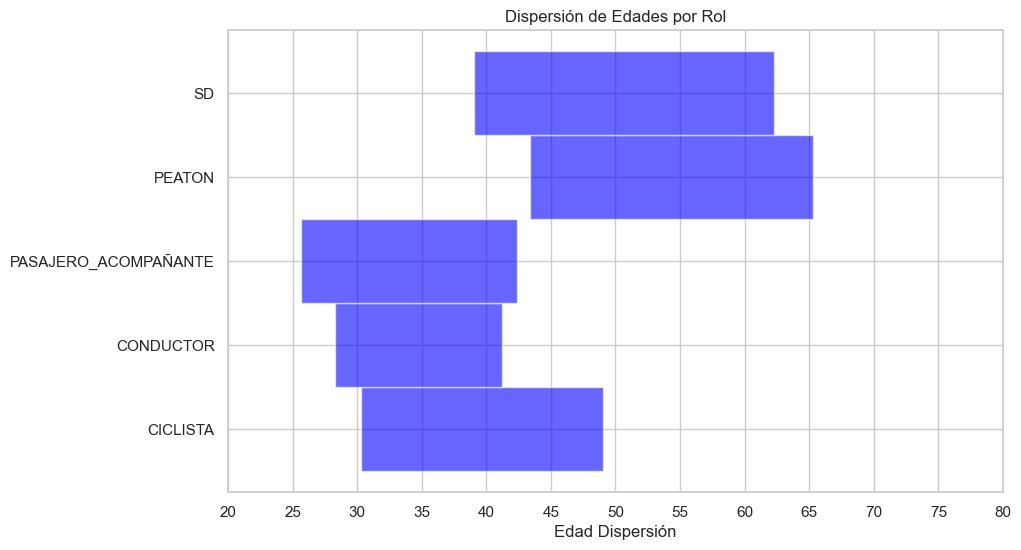

In [40]:
# Calcula el promedio y la desviación estándar de la edad por rol de víctima
summary_data = df_accidentes.groupby('ROL_VICTIMA')['EDAD_VICTIMA'].agg(['mean', 'std']).reset_index()

# Prepara una figura y un eje para el gráfico de Matplotlib, estableciendo el espacio para el gráfico que se generará.
fig, ax = plt.subplots(figsize=(10, 6))

# Itera a través de cada fila del DataFrame resumen para dibujar una barra horizontal por cada rol.
# La barra representa la dispersión de edades (desviación estándar) alrededor del promedio, ajustando la posición de la barra para centrarla en el promedio de edad.
for index, row in summary_data.iterrows():
    rol = row['ROL_VICTIMA']  # Nombre de la columna corregido
    edad_promedio = row['mean']
    dispersion = row['std']

    # Dibuja cada barra horizontal. La posición de inicio de cada barra se ajusta para centrarla en el promedio de edad.
    ax.barh(rol, dispersion, height=1, left=edad_promedio-dispersion/2, color='blue', alpha=0.6)

# Configura la etiqueta del eje X y el título del gráfico para proporcionar contexto.
ax.set_xlabel('Edad Dispersión')
ax.set_title('Dispersión de Edades por Rol')

# Ajusta el rango del eje X para abarcar un rango específico de edades y configura los ticks y etiquetas del eje X para mejorar la legibilidad.
ax.set_xlim(20, 80)
ax.set_xticks(np.arange(20, 81, 5))
ax.set_xticklabels(np.arange(20, 81, 5))

# Muestra el gráfico
plt.show()

In [ ]:
# Podria borrar los registros SD pero me parece importante la estadística donde el accidente no 
# ofrece información del rol que cumplía la víctima en el hecho, que en este caso es bastante alto

In [41]:
# Pienso que el análisis EDA, aunque se pueden analizar muchisimos aspectos mas esta bien hasta este punto,
# por lo que voy a guardar el dataframe analizado para tener el data frame antes y después del análisis

df_accidentes.to_json('df_accidentes_analizado.json')
